# PuLP の使い方  

問題  

材料 A と B から合成できる化学製品 X と Y を製造する。  
X (販売価格 100 円) を 1 kg 作るためには A が 1 kg、B が 3 kg 必要である。  
Y (販売価格 100 円) を 1 kg 作るためには A が 2 kg、B が 1 kg 必要である。  
材料 A は 16 kg、 B は 18 kg しかないとき、販売価格を最大化するためには X と Y をどれだけ製造すればよいか。

定式化  

- 変数: ${x, y \geq 0}$  
- 目的関数: $100x+100y \to maximize$  
- 制約条件: $x+2y=16, 3x+y \leq 18$

In [1]:
# 必要なモジュールのインポート
from pulp import LpProblem, LpMaximize, LpVariable, value

In [2]:
# 数理モデルの作成
m = LpProblem(sense=LpMaximize)

# 数理モデルで使用する変数の定義
x = LpVariable("x", lowBound=0)
y = LpVariable("y", lowBound=0)

In [3]:
# 目的関数の定義
m += 100 * x + 100 * y

# 制約条件の定義
m += x + 2 * y <= 16
m += 3 * x +y <= 18

# ソルバーの実行と表示
m.solve()
print(value(x), value(y))

1

In [8]:
# 計算結果の表示
from pulp import LpStatus
LpStatus[m.status]

'Optimal'

In [12]:
[("x%.6d" % i) for i in range(20)]

['x000000',
 'x000001',
 'x000002',
 'x000003',
 'x000004',
 'x000005',
 'x000006',
 'x000007',
 'x000008',
 'x000009',
 'x000010',
 'x000011',
 'x000012',
 'x000013',
 'x000014',
 'x000015',
 'x000016',
 'x000017',
 'x000018',
 'x000019']

## pandas と変数表

In [2]:
import numpy as np
import pandas as pd

In [14]:
df = pd.DataFrame(np.arange(2, 14, 2).reshape(2, -1), columns=["A", "B", "C"])
df

,A,B,C
0,2,4,6
1,8,10,12


## NetworkX  

In [3]:
import pandas as pd
import networkx as nx

In [5]:
dfnd = pd.read_csv("./notebooks/files/data/node0.csv")
dfed = pd.read_csv("./notebooks/files/data/edge0.csv")
dfnd

,id,x,y,demand,weight
0,0,5,5,-4,4
1,1,5,8,1,3
2,2,10,5,0,1
3,3,7,0,1,1
4,4,2,2,1,2
5,5,0,5,1,1


In [6]:
dfed

,node1,node2,capacity,weight
0,0,1,2,1
1,0,2,2,4
2,0,3,2,2
3,0,4,2,2
4,0,5,2,4
5,1,2,2,5
6,1,5,2,5
7,2,3,2,3
8,3,4,2,4
9,4,5,2,1


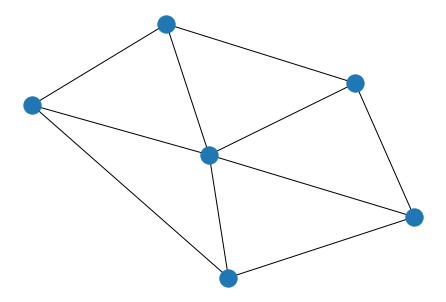

In [7]:
g = nx.Graph()

# DataFrame.itertuples は一行ずつ取り出す
# index=False でインデックス行を無視
for row in dfnd.itertuples(index=False):
    dc = row._asdict()
    g.add_node(dc["id"], **dc)

for row in dfed.itertuples(index=False):
    dc = row._asdict()
    g.add_edge(dc["node1"], dc["node2"], **dc)
    
nx.draw(g)